<a href="https://colab.research.google.com/github/kenz3wiz/Stats/blob/main/titanicSurvivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_data.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [4]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_data.count()

,0
PassengerId,418
Pclass,418
Name,418
Sex,418
Age,332
SibSp,418
Parch,418
Ticket,418
Fare,417
Cabin,91


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [11]:
!pip install matplotlib seaborn


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_path = "/content/test.csv"
df = pd.read_csv(df_path)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


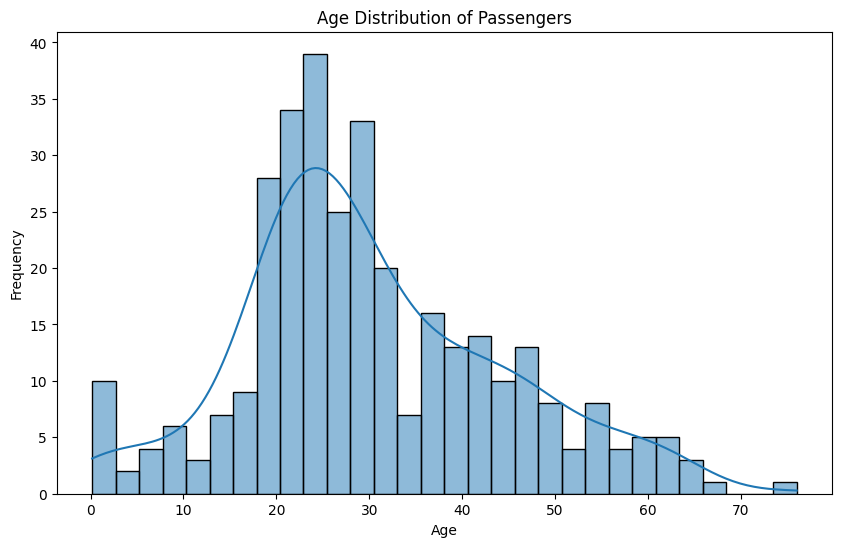

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(test_data['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-23-69871de2de68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Survived', palette='Set2')


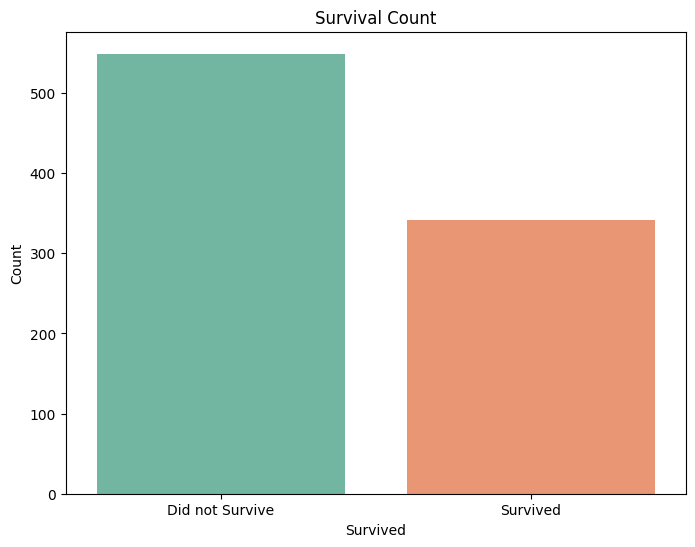

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Survived', palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not Survive', 'Survived'])
plt.show()


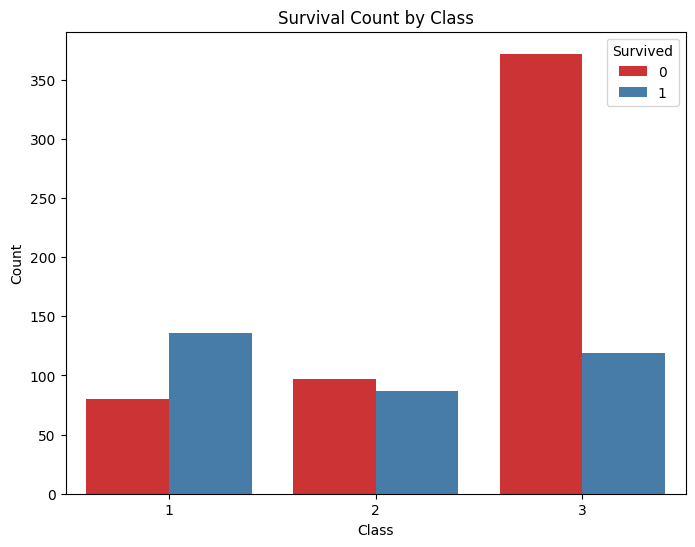

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

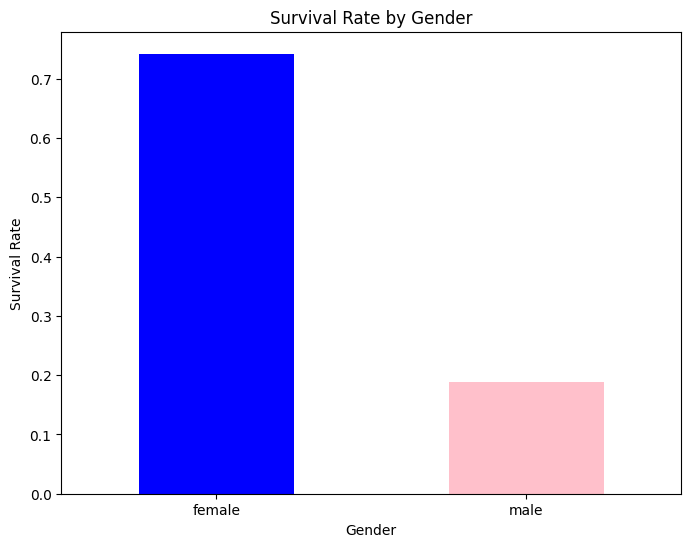

In [26]:
gender_survival = train_data.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8,6))
gender_survival.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


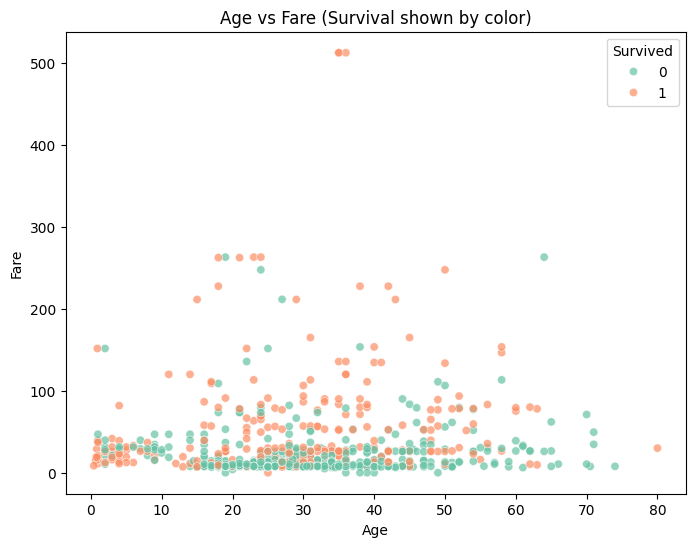

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived', palette='Set2', alpha=0.7)
plt.title('Age vs Fare (Survival shown by color)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [33]:
# Create a new column 'Family Type' to categorize based on the 'Parch' value
train_data['Family Type'] = train_data['Parch'].apply(lambda x: 'No children/parents' if x == 0 else 'Has children/parents')

# Group by 'Family Type' and calculate survival rates
survival_by_family = train_data.groupby('Family Type')['Survived'].mean()

# Display the result
print(survival_by_family)


Family Type
Has children/parents    0.511737
No children/parents     0.343658
Name: Survived, dtype: float64


In [34]:
# Create a new column to categorize passengers into different groups based on 'Parch'
train_data['Parch Category'] = train_data['Parch'].apply(lambda x: 'None' if x == 0 else ('1-2 parents/children' if x <= 2 else '3+ parents/children'))

# Group by 'Parch Category' and calculate survival rates
survival_by_parch = train_data.groupby('Parch Category')['Survived'].mean()

# Display the result
print(survival_by_parch)


Parch Category
1-2 parents/children    0.530303
3+ parents/children     0.266667
None                    0.343658
Name: Survived, dtype: float64


1-2 parents/children (0.530303): Passengers who were traveling with 1 or 2 parents or children had a survival rate of approximately 53.03%.
3+ parents/children (0.266667): Passengers with 3 or more parents or children had a survival rate of approximately 26.67%. This indicates that having more family members aboard might have been associated with a lower survival rate.
None (0.343658): Passengers without any parents or children aboard (i.e., those who were traveling alone or with no family) had a survival rate of approximately 34.37%.

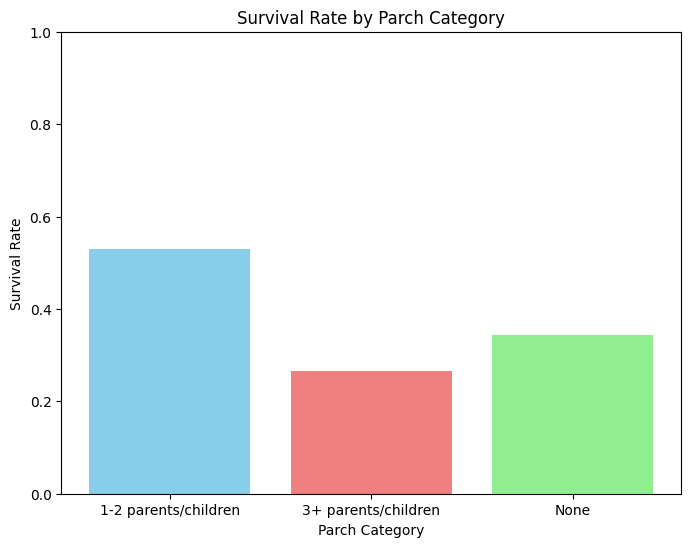

In [35]:
import matplotlib.pyplot as plt

# Survival rate by Parch Category
survival_rates = {
    '1-2 parents/children': 0.530303,
    '3+ parents/children': 0.266667,
    'None': 0.343658
}

# Create the bar chart
plt.figure(figsize=(8,6))
plt.bar(survival_rates.keys(), survival_rates.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Survival Rate by Parch Category")
plt.xlabel("Parch Category")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()
